Assigment (Advanced Regression)

A US-based housing company named Surprise Housing has decided to enter the Australian market. The company uses data analytics to purchase houses at a price below their actual values and flip them on at a higher price. For the same purpose, the company has collected a data set from the sale of houses in Australia. The data is provided in the CSV file below.

 

The company is looking at prospective properties to buy to enter the market. You are required to build a regression model using regularisation in order to predict the actual value of the prospective properties and decide whether to invest in them or not.

 

The company wants to know:

Which variables are significant in predicting the price of a house, and

How well those variables describe the price of a house.

 

Also, determine the optimal value of lambda for ridge and lasso regression.

 

Business Goal 

 

You are required to model the price of houses with the available independent variables. This model will then be used by the management to understand how exactly the prices vary with the variables. They can accordingly manipulate the strategy of the firm and concentrate on areas that will yield high returns. Further, the model will be a good way for management to understand the pricing dynamics of a new market.

In [518]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import linear_model
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.model_selection import GridSearchCV

import os

# hide warnings
import warnings
warnings.filterwarnings('ignore')

In [519]:
# read the data
df1 = pd.read_csv("train.csv")

In [520]:
#1460 rows and 81 columns
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
Id               1460 non-null int64
MSSubClass       1460 non-null int64
MSZoning         1460 non-null object
LotFrontage      1201 non-null float64
LotArea          1460 non-null int64
Street           1460 non-null object
Alley            91 non-null object
LotShape         1460 non-null object
LandContour      1460 non-null object
Utilities        1460 non-null object
LotConfig        1460 non-null object
LandSlope        1460 non-null object
Neighborhood     1460 non-null object
Condition1       1460 non-null object
Condition2       1460 non-null object
BldgType         1460 non-null object
HouseStyle       1460 non-null object
OverallQual      1460 non-null int64
OverallCond      1460 non-null int64
YearBuilt        1460 non-null int64
YearRemodAdd     1460 non-null int64
RoofStyle        1460 non-null object
RoofMatl         1460 non-null object
Exterior1st      1460 non-n

In [521]:
df1.shape

(1460, 81)

In [522]:
df1.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


## Treating missing values


In [523]:
df1.isnull().sum()

Id                 0
MSSubClass         0
MSZoning           0
LotFrontage      259
LotArea            0
                ... 
MoSold             0
YrSold             0
SaleType           0
SaleCondition      0
SalePrice          0
Length: 81, dtype: int64

In [533]:
round(100*(df1.iloc[:,:11].isnull().sum()/len(df1.iloc[:,:11].index)),2)

Id              0.0
MSSubClass      0.0
MSZoning        0.0
LotArea         0.0
Street          0.0
LotShape        0.0
LandContour     0.0
Utilities       0.0
LotConfig       0.0
LandSlope       0.0
Neighborhood    0.0
dtype: float64

In [526]:
round(100*(df1.iloc[:,11:22].isnull().sum()/len(df1.iloc[:,11:22].index)),2)

Condition1      0.0
Condition2      0.0
BldgType        0.0
HouseStyle      0.0
OverallQual     0.0
OverallCond     0.0
YearBuilt       0.0
YearRemodAdd    0.0
RoofStyle       0.0
RoofMatl        0.0
Exterior1st     0.0
dtype: float64

In [535]:
round(100*(df1.iloc[:,22:33].isnull().sum()/len(df1.iloc[:,22:33].index)),2)

Exterior2nd     0.0
MasVnrType      0.0
MasVnrArea      0.0
ExterQual       0.0
ExterCond       0.0
Foundation      0.0
BsmtQual        0.0
BsmtCond        0.0
BsmtExposure    0.0
BsmtFinType1    0.0
BsmtFinSF1      0.0
dtype: float64

In [ ]:
#drop alley
df1=df1.drop(['Alley'],axis=1)
df1=df1.drop(['LotFrontage'],axis=1)
df1=df1.drop(['FireplaceQu'],axis=1)
df1=df1.drop(['PoolQC','Fence','MiscFeature'],axis=1)

In [534]:
df1= df1.dropna(axis=0)

count    1452.000000
mean      103.685262
std       181.066207
min         0.000000
25%         0.000000
50%         0.000000
75%       166.000000
max      1600.000000
Name: MasVnrArea, dtype: float64

In [536]:
round(100*(df1.iloc[:,33:44].isnull().sum()/len(df1.iloc[:,33:44].index)),2)

BsmtFinType2    0.0
BsmtFinSF2      0.0
BsmtUnfSF       0.0
TotalBsmtSF     0.0
Heating         0.0
HeatingQC       0.0
CentralAir      0.0
Electrical      0.0
1stFlrSF        0.0
2ndFlrSF        0.0
LowQualFinSF    0.0
dtype: float64

In [424]:
round(100*(df1.iloc[:,44:55].isnull().sum()/len(df1.iloc[:,44:55].index)),2)

GrLivArea       0.0
BsmtFullBath    0.0
BsmtHalfBath    0.0
FullBath        0.0
HalfBath        0.0
BedroomAbvGr    0.0
KitchenAbvGr    0.0
KitchenQual     0.0
TotRmsAbvGrd    0.0
Functional      0.0
Fireplaces      0.0
dtype: float64

In [537]:
#we do not consider na as null value has it has some meaning .
#Example NA	No Garage
#so we fill it with 0 to avoid errors
round(100*(df1.iloc[:,55:66].isnull().sum()/len(df1.iloc[:,55:66].index)),2)

GarageType       0.0
GarageYrBlt      0.0
GarageFinish     0.0
GarageCars       0.0
GarageArea       0.0
GarageQual       0.0
GarageCond       0.0
PavedDrive       0.0
WoodDeckSF       0.0
OpenPorchSF      0.0
EnclosedPorch    0.0
dtype: float64

In [531]:
round(100*(df1.iloc[:,66:77].isnull().sum()/len(df1.iloc[:,66:77].index)),2)

3SsnPorch        0.0
ScreenPorch      0.0
PoolArea         0.0
MiscVal          0.0
MoSold           0.0
YrSold           0.0
SaleType         0.0
SaleCondition    0.0
SalePrice        0.0
dtype: float64

In [429]:
round(100*(df1.isnull().sum()/len(df1.index)),2)

Id               0.0
MSSubClass       0.0
MSZoning         0.0
LotArea          0.0
Street           0.0
                ... 
MoSold           0.0
YrSold           0.0
SaleType         0.0
SaleCondition    0.0
SalePrice        0.0
Length: 75, dtype: float64

In [532]:
df1.shape

(1460, 75)

In [431]:
round(100*(df1.iloc[:,60:].isnull().sum()/len(df1.iloc[:,60:].index)),2)

GarageQual       0.0
GarageCond       0.0
PavedDrive       0.0
WoodDeckSF       0.0
OpenPorchSF      0.0
EnclosedPorch    0.0
3SsnPorch        0.0
ScreenPorch      0.0
PoolArea         0.0
MiscVal          0.0
MoSold           0.0
YrSold           0.0
SaleType         0.0
SaleCondition    0.0
SalePrice        0.0
dtype: float64

In [432]:
df1.isnull().sum()

Id               0
MSSubClass       0
MSZoning         0
LotArea          0
Street           0
                ..
MoSold           0
YrSold           0
SaleType         0
SaleCondition    0
SalePrice        0
Length: 75, dtype: int64

# Data Exploration


In [538]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1338 entries, 0 to 1459
Data columns (total 75 columns):
Id               1338 non-null int64
MSSubClass       1338 non-null int64
MSZoning         1338 non-null object
LotArea          1338 non-null int64
Street           1338 non-null object
LotShape         1338 non-null object
LandContour      1338 non-null object
Utilities        1338 non-null object
LotConfig        1338 non-null object
LandSlope        1338 non-null object
Neighborhood     1338 non-null object
Condition1       1338 non-null object
Condition2       1338 non-null object
BldgType         1338 non-null object
HouseStyle       1338 non-null object
OverallQual      1338 non-null int64
OverallCond      1338 non-null int64
YearBuilt        1338 non-null int64
YearRemodAdd     1338 non-null int64
RoofStyle        1338 non-null object
RoofMatl         1338 non-null object
Exterior1st      1338 non-null object
Exterior2nd      1338 non-null object
MasVnrType       1338 non-

In [539]:
#derived metric
import datetime 
date=datetime.datetime.now().year
df1['Age']=date-df1['YearBuilt']
df1['Age']
df1=df1.drop(['YearBuilt'],axis=1)

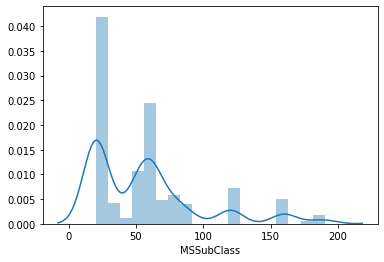

In [540]:
sns.distplot(df1['MSSubClass'])
plt.show()

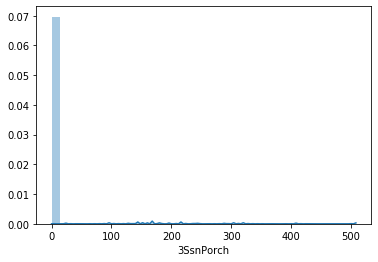

In [541]:
sns.distplot(df1['3SsnPorch'])
plt.show()

In [542]:
#df1=df1.drop(['3SsnPorch'],axis=1)

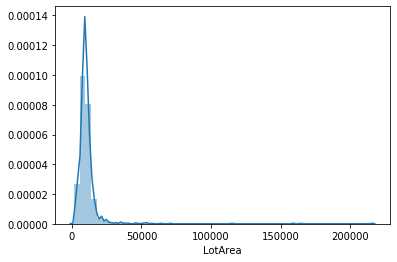

In [543]:
sns.distplot(df1['LotArea'])
plt.show()

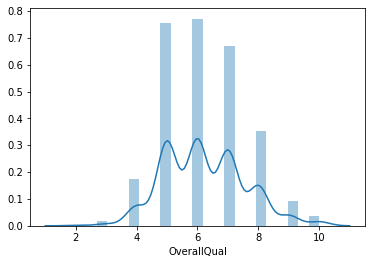

In [544]:
sns.distplot(df1['OverallQual'])
plt.show()

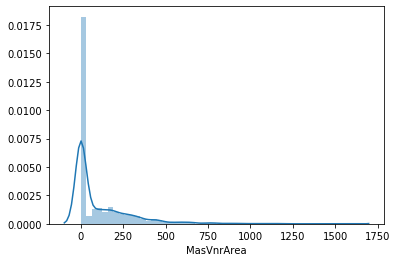

In [545]:
sns.distplot(df1['MasVnrArea'])
plt.show()

In [546]:
#df1=df1.drop(['MasVnrArea'],axis=1)

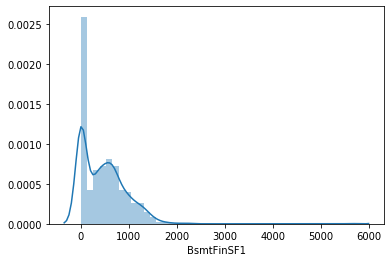

In [547]:
sns.distplot(df1['BsmtFinSF1'])
plt.show()

In [548]:
#df1=df1.drop(['BsmtFinSF1'],axis=1)

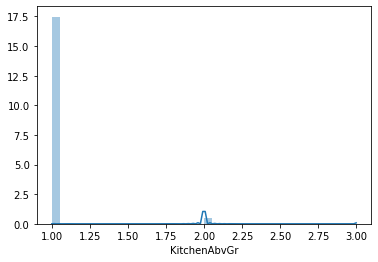

In [549]:
sns.distplot(df1['KitchenAbvGr'])
plt.show()

In [550]:
#df1=df1.drop(['KitchenAbvGr'],axis=1)

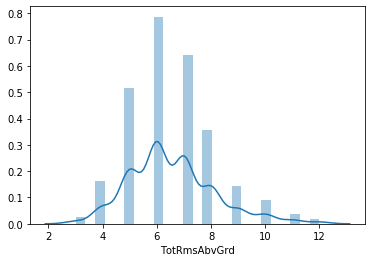

In [551]:
sns.distplot(df1['TotRmsAbvGrd'])
plt.show()

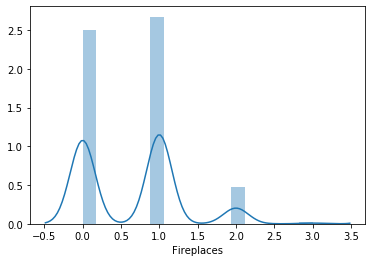

In [552]:
sns.distplot(df1['Fireplaces'])
plt.show()

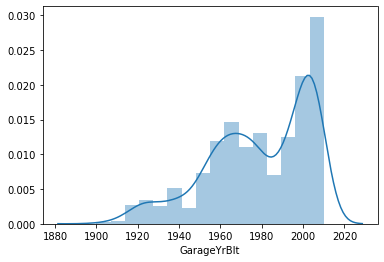

In [553]:
sns.distplot(df1['GarageYrBlt'])
plt.show()

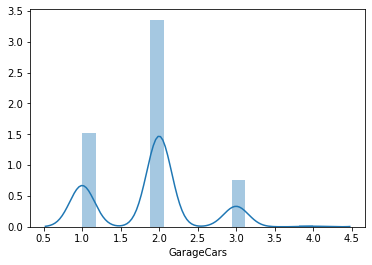

In [554]:
sns.distplot(df1['GarageCars'])
plt.show()

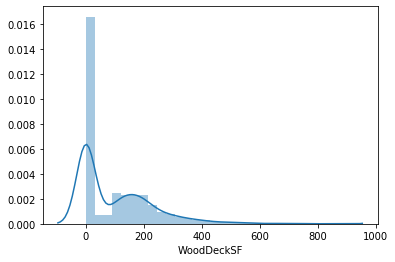

In [555]:
sns.distplot(df1['WoodDeckSF'])
plt.show()


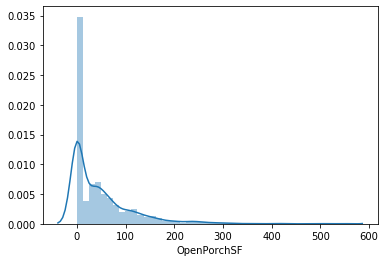

In [556]:
sns.distplot(df1['OpenPorchSF'])
plt.show()

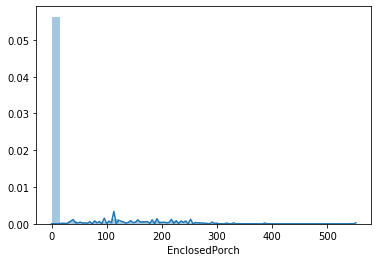

In [557]:
sns.distplot(df1['EnclosedPorch'])
plt.show()

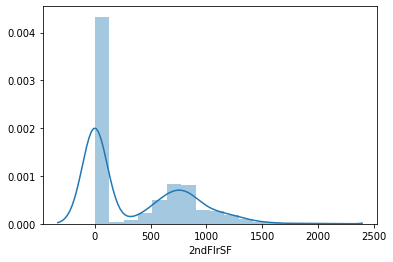

In [558]:
sns.distplot(df1['2ndFlrSF'])
plt.show()

In [559]:
#df1=df1.drop(['PoolArea'],axis=1)

In [560]:
#df1=df1.drop(['EnclosedPorch','GarageYrBlt'],axis=1)

In [561]:
df_num=df1.select_dtypes(include=['float64','int64'])

In [562]:
df_num.columns

Index(['Id', 'MSSubClass', 'LotArea', 'OverallQual', 'OverallCond',
       'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF',
       'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea',
       'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr',
       'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'GarageYrBlt',
       'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF',
       'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal',
       'MoSold', 'YrSold', 'SalePrice', 'Age'],
      dtype='object')

In [563]:
#we do not want id 
df_num=df_num.drop(['Id'],axis=1)

In [595]:
df_num.columns

Index(['LotArea', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2',
       'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF',
       'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath',
       'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces',
       'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF',
       'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal',
       'MoSold', 'YrSold', 'SalePrice', 'Age'],
      dtype='object')

In [564]:
df_num=df_num.drop(['MSSubClass','OverallQual','OverallCond'],axis=1)

In [565]:
df_num.columns

Index(['LotArea', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2',
       'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF',
       'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath',
       'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces',
       'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF',
       'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal',
       'MoSold', 'YrSold', 'SalePrice', 'Age'],
      dtype='object')

In [566]:
#plt.figure(figsize=(1, 2))
sns.pairplot(df_num)
plt.show()

In [567]:
cor=df_num.corr()

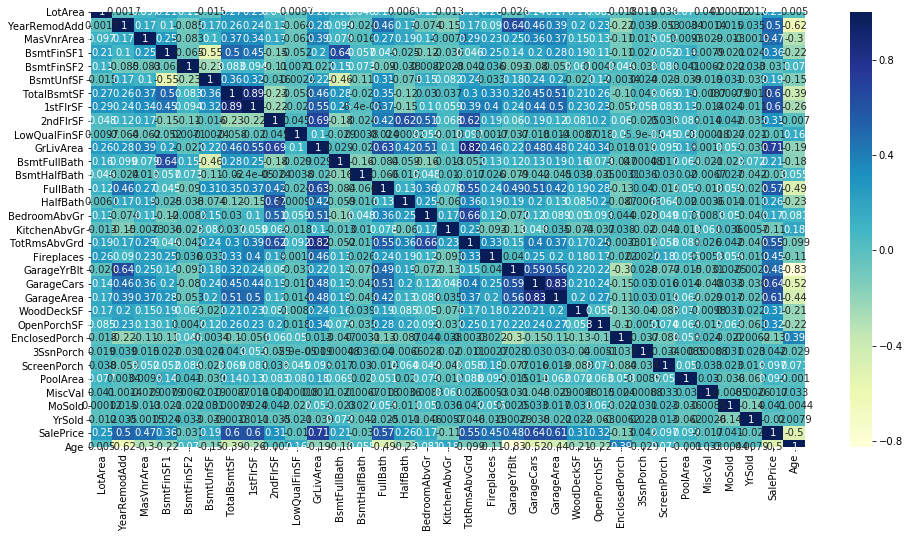

In [568]:
# plotting correlations on a heatmap

# figure size
plt.figure(figsize=(16,8))

# heatmap
sns.heatmap(cor, cmap="YlGnBu", annot=True)
plt.show()

In [569]:
#sales price is highly coorelated to GrLiveArea, TotalBsmntFinSF1 , FullBath


In [570]:
#Data Cleaning ( Dummy variable creation)

In [571]:
df1[['MSSubClass','OverallQual','OverallCond']] =df1[['MSSubClass','OverallQual','OverallCond']].astype('object')

In [572]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1338 entries, 0 to 1459
Data columns (total 75 columns):
Id               1338 non-null int64
MSSubClass       1338 non-null object
MSZoning         1338 non-null object
LotArea          1338 non-null int64
Street           1338 non-null object
LotShape         1338 non-null object
LandContour      1338 non-null object
Utilities        1338 non-null object
LotConfig        1338 non-null object
LandSlope        1338 non-null object
Neighborhood     1338 non-null object
Condition1       1338 non-null object
Condition2       1338 non-null object
BldgType         1338 non-null object
HouseStyle       1338 non-null object
OverallQual      1338 non-null object
OverallCond      1338 non-null object
YearRemodAdd     1338 non-null int64
RoofStyle        1338 non-null object
RoofMatl         1338 non-null object
Exterior1st      1338 non-null object
Exterior2nd      1338 non-null object
MasVnrType       1338 non-null object
MasVnrArea       1338 

In [573]:
df1.describe()

,Id,LotArea,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,...,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice,Age
count,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000,...,1338.000000,1338.000000,1338.000000,1338.00000,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000
mean,731.228700,10706.294469,1985.668909,110.360239,464.234679,49.218236,582.494768,1095.947683,1176.221973,357.141256,...,47.782511,21.263827,3.585949,16.43423,3.010463,42.932735,6.331839,2007.805680,186761.782511,46.970852
std,421.779691,10336.621126,20.296463,185.604816,458.792420,166.196584,439.950528,405.554435,386.644986,440.324982,...,65.362562,60.843964,30.224622,58.05159,41.961337,508.056255,2.699437,1.330691,78913.847668,29.563540
min,1.000000,1300.000000,1950.000000,0.000000,0.000000,0.000000,0.000000,105.000000,438.000000,0.000000,...,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,1.000000,2006.000000,35311.000000,10.000000
25%,366.250000,7744.000000,1968.000000,0.000000,0.000000,0.000000,248.000000,819.750000,894.000000,0.000000,...,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,5.000000,2007.000000,135000.000000,19.000000
50%,730.500000,9600.000000,1994.500000,0.000000,413.000000,0.000000,489.000000,1021.500000,1098.000000,0.000000,...,28.000000,0.000000,0.000000,0.00000,0.000000,0.000000,6.000000,2008.000000,168500.000000,44.000000
75%,1098.750000,11760.750000,2004.000000,174.000000,733.000000,0.000000,815.750000,1324.000000,1414.000000,740.500000,...,70.000000,0.000000,0.000000,0.00000,0.000000,0.000000,8.000000,2009.000000,220000.000000,64.000000
max,1460.000000,215245.000000,2010.000000,1600.000000,5644.000000,1474.000000,2336.000000,6110.000000,4692.000000,2065.000000,...,547.000000,552.000000,508.000000,480.00000,738.000000,15500.000000,12.000000,2010.000000,755000.000000,140.000000


In [574]:
#outliers are in LotArean masvnrarea bsmtfinsf1 


In [575]:
#dealing with outliers
#Q1 = df1.quantile(0.05)
#Q3 = df1.quantile(0.95)
#IQR = Q3 - Q1
#df1 = df1[~((df1 < (Q1 - 1.5 * IQR)) |(df1 > (Q3 + 1.5 * IQR))).any(axis=1)]
#df1.shape

# Creating dummy variables

In [576]:
df_cat=df1.select_dtypes(include=['object'])

In [577]:
df_cat.columns

Index(['MSSubClass', 'MSZoning', 'Street', 'LotShape', 'LandContour',
       'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1',
       'Condition2', 'BldgType', 'HouseStyle', 'OverallQual', 'OverallCond',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond',
       'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Heating', 'HeatingQC',
       'CentralAir', 'Electrical', 'KitchenQual', 'Functional', 'GarageType',
       'GarageFinish', 'GarageQual', 'GarageCond', 'PavedDrive', 'SaleType',
       'SaleCondition'],
      dtype='object')

In [578]:
df_dummies=pd.get_dummies(df_cat,drop_first=True)

In [579]:
df_dummies.head()

,MSSubClass_30,MSSubClass_40,MSSubClass_45,MSSubClass_50,MSSubClass_60,MSSubClass_70,MSSubClass_75,MSSubClass_80,MSSubClass_85,MSSubClass_90,...,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,1,0,0,0,1,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,1,0
2,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,1,0,0,0,1,0
3,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
4,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,1,0,0,0,1,0


In [598]:
df_final=df1

In [599]:
df_final=df1.drop(list(df_cat.columns),axis=1)

In [600]:
df_final=pd.concat([df_final, df_dummies], axis=1)

In [613]:
df_final.columns

Index(['LotArea', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2',
       'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF',
       ...
       'SaleType_ConLI', 'SaleType_ConLw', 'SaleType_New', 'SaleType_Oth',
       'SaleType_WD', 'SaleCondition_AdjLand', 'SaleCondition_Alloca',
       'SaleCondition_Family', 'SaleCondition_Normal',
       'SaleCondition_Partial'],
      dtype='object', length=253)

In [611]:
df_final=df_final.drop(['Id'],axis=1)

KeyError: "['Id'] not found in axis"

## Model Building


In [614]:
# split into X and y
X=df_final
y=df_final['SalePrice']

In [658]:
X=X.drop(['SalePrice'],axis=1)

In [659]:
X.columns

Index(['LotArea', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2',
       'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF',
       ...
       'SaleType_ConLI', 'SaleType_ConLw', 'SaleType_New', 'SaleType_Oth',
       'SaleType_WD', 'SaleCondition_AdjLand', 'SaleCondition_Alloca',
       'SaleCondition_Family', 'SaleCondition_Normal',
       'SaleCondition_Partial'],
      dtype='object', length=252)

In [660]:
# scaling the features
from sklearn.preprocessing import scale

# storing column names in cols, since column names are (annoyingly) lost after 
# scaling (the df is converted to a numpy array)
cols = X.columns
X = pd.DataFrame(scale(X))
X.columns = cols
X.columns

Index(['LotArea', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2',
       'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF',
       ...
       'SaleType_ConLI', 'SaleType_ConLw', 'SaleType_New', 'SaleType_Oth',
       'SaleType_WD', 'SaleCondition_AdjLand', 'SaleCondition_Alloca',
       'SaleCondition_Family', 'SaleCondition_Normal',
       'SaleCondition_Partial'],
      dtype='object', length=252)

In [661]:
# split into train and test
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    train_size=0.7,
                                                    test_size = 0.3, random_state=100)

## Ridge and Lasso Regression

In [712]:
# list of alphas to tune
params = {'alpha': [0.0001,0.001,0.01,0.05,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1.0,2.0,3.0,4.0,5.0,6.0,7.0,8.0,9.0,10.0,20,50]}


ridge = Ridge()

# cross validation
folds = 5
model_cv = GridSearchCV(estimator = ridge, 
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error', 
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            
model_cv.fit(X_train, y_train) 

Fitting 5 folds for each of 25 candidates, totalling 125 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 125 out of 125 | elapsed:    1.0s finished


GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=Ridge(alpha=1.0, copy_X=True, fit_intercept=True,
                             max_iter=None, normalize=False, random_state=None,
                             solver='auto', tol=0.001),
             iid='warn', n_jobs=None,
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3,
                                   0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0,
                                   4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20,
                                   50]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
             scoring='neg_mean_absolute_error', verbose=1)

In [713]:
cv_results = pd.DataFrame(model_cv.cv_results_)
cv_results = cv_results[cv_results['param_alpha']<=200]
cv_results.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_alpha,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.007289,0.000404,0.001196,0.000399,0.0001,{'alpha': 0.0001},-21329.462040,-17634.914117,-19749.887094,-17096.247737,...,-19830.980136,2316.230246,25,-12066.536160,-12415.007266,-11681.389931,-13225.353025,-10780.504162,-12033.758109,807.605418
1,0.006981,0.001266,0.001195,0.000395,0.001,{'alpha': 0.001},-21322.878648,-17634.845116,-19749.386014,-17095.849889,...,-19828.618224,2314.205099,24,-12066.629257,-12414.987135,-11681.452080,-13225.390397,-10780.710931,-12033.833960,807.545705
2,0.006184,0.000747,0.001396,0.000489,0.01,{'alpha': 0.01},-21265.152789,-17634.153723,-19744.456006,-17091.912601,...,-19807.186480,2295.852826,23,-12067.561516,-12414.797108,-11682.053680,-13225.751274,-10782.713862,-12034.575488,806.967839
3,0.005586,0.001017,0.001196,0.000399,0.05,{'alpha': 0.05},-21102.839547,-17631.103754,-19724.077678,-17075.446211,...,-19737.451443,2235.719540,22,-12072.682246,-12415.665085,-11684.625322,-13227.112858,-10791.174678,-12038.252038,804.645250
4,0.005984,0.000892,0.001396,0.000489,0.1,{'alpha': 0.1},-20951.653752,-17627.465173,-19702.264945,-17056.323501,...,-19670.017584,2179.726905,21,-12079.873850,-12418.065440,-11687.410624,-13229.441407,-10800.180112,-12042.994286,802.586077


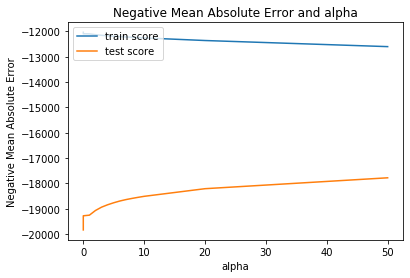

In [714]:
# plotting mean test and train scoes with alpha 
cv_results['param_alpha'] = cv_results['param_alpha'].astype('int32')

# plotting
plt.plot(cv_results['param_alpha'], cv_results['mean_train_score'])
plt.plot(cv_results['param_alpha'], cv_results['mean_test_score'])
plt.xlabel('alpha')
plt.ylabel('Negative Mean Absolute Error')
plt.title("Negative Mean Absolute Error and alpha")
plt.legend(['train score', 'test score'], loc='upper left')
plt.show()

In [715]:
model_cv.best_params_

{'alpha': 50}

In [716]:
alpha = 500
ridge = Ridge(alpha=alpha)

ridge.fit(X_train, y_train)
ridge.coef_

array([ 2.71542412e+03,  2.55641846e+03,  4.17234005e+03,  5.20720435e+03,
        4.38775736e+02, -1.16974458e+02,  5.94368039e+03,  6.09498592e+03,
        4.56823927e+03,  1.18164911e+02,  8.40008604e+03,  1.81009627e+03,
       -2.00739401e+02,  3.27812980e+03,  1.57717035e+03,  2.42798933e+02,
       -2.01045164e+03,  4.82343978e+03,  3.62727999e+03,  5.73017940e+02,
        3.06209610e+03,  4.47172597e+03,  1.69782928e+03,  1.29746934e+03,
        5.66597180e+02,  9.52649269e+02,  1.56229111e+03,  3.06508390e+03,
        2.08978115e+02, -4.74831936e+02,  1.24386320e+02, -2.19047025e+03,
       -8.68999282e+02,  7.21160850e+01,  2.46260309e+02,  1.38436097e+02,
        1.21817381e+03,  5.26804654e+02,  6.68901505e+02, -7.45387088e+02,
       -7.76100403e+02, -6.85574107e+02, -1.20329602e+03, -1.16424880e+03,
       -3.85360301e+02, -8.48977061e+02,  6.98312404e+02,  1.33963575e+01,
        1.08732095e+03, -1.06825339e+03,  7.78083035e+02,  1.20232335e+03,
        4.41007257e+02, -

In [725]:
model_param1=list(ridge.coef_)
model_param1.insert(0,ridge.intercept_)
cols1=X.columns
cols1.insert(0,'constant')
ridge.coef_=pd.DataFrame(list(zip(cols1,model_param1)))
ridge.coef_.columns=['Feature','Coef']
ridge.coef_.sort_values(by="Coef",ascending =False).head(10)

TypeError: '<' not supported between instances of 'numpy.ndarray' and 'str'

In [729]:
import sklearn.metrics as metrics

lm = Ridge(alpha=500)
lm.fit(X_train, y_train)

y_train_pred = lm.predict(X_train)
print(metrics.r2_score(y_true=y_train, y_pred=y_train_pred))
y_test_pred = lm.predict(X_test)
print(metrics.r2_score(y_true=y_test, y_pred=y_test_pred))

0.9068330721178951
0.7742616733538115


In [718]:
# Lot Area , BsmntFullBath , OverallCond_3 , 2ndFLrSf, 1stFlrSF are the top 5 features that are used to explain this model.
#The coefficient values are given above.

In [719]:
lasso = Lasso()

# cross validation
model_cv = GridSearchCV(estimator = lasso, 
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error', 
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            

model_cv.fit(X_train, y_train) 

Fitting 5 folds for each of 25 candidates, totalling 125 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 125 out of 125 | elapsed:   14.2s finished


GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=Lasso(alpha=1.0, copy_X=True, fit_intercept=True,
                             max_iter=1000, normalize=False, positive=False,
                             precompute=False, random_state=None,
                             selection='cyclic', tol=0.0001, warm_start=False),
             iid='warn', n_jobs=None,
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3,
                                   0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0,
                                   4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20,
                                   50]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
             scoring='neg_mean_absolute_error', verbose=1)

In [720]:
cv_results = pd.DataFrame(model_cv.cv_results_)
cv_results.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_alpha,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.112059,0.012044,0.001202,0.000409,0.0001,{'alpha': 0.0001},-21098.556874,-17574.024581,-19597.582430,-16964.704921,...,-19656.935498,2241.071597,25,-12088.292799,-12421.300887,-11697.037438,-13241.888735,-10810.202793,-12051.744530,802.694701
1,0.099375,0.005558,0.000984,0.000016,0.001,{'alpha': 0.001},-21098.195747,-17574.186737,-19597.667459,-16964.711058,...,-19656.868179,2240.924338,24,-12088.295752,-12421.302587,-11697.039069,-13241.887262,-10810.207468,-12051.746428,802.692857
2,0.111169,0.007291,0.001199,0.000398,0.01,{'alpha': 0.01},-21094.584322,-17575.808275,-19598.518516,-16964.772459,...,-19656.195140,2239.452186,23,-12088.326603,-12421.320114,-11697.056813,-13241.872941,-10810.254251,-12051.766144,802.674465
3,0.099406,0.009987,0.000993,0.000008,0.05,{'alpha': 0.05},-21078.570711,-17583.017418,-19602.797867,-16965.075387,...,-19653.317936,2232.914698,22,-12088.472009,-12421.408086,-11697.150349,-13241.823908,-10810.482110,-12051.867293,802.590597
4,0.099605,0.005571,0.038645,0.075294,0.1,{'alpha': 0.1},-21058.575476,-17592.086938,-19608.639360,-16965.975029,...,-19649.947229,2224.640691,21,-12088.674427,-12421.560184,-11697.298253,-13241.765675,-10810.771308,-12052.013969,802.486648


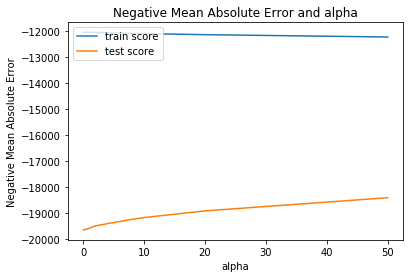

In [721]:
# plotting mean test and train scoes with alpha 
cv_results['param_alpha'] = cv_results['param_alpha'].astype('float32')

# plotting
plt.plot(cv_results['param_alpha'], cv_results['mean_train_score'])
plt.plot(cv_results['param_alpha'], cv_results['mean_test_score'])
plt.xlabel('alpha')
plt.ylabel('Negative Mean Absolute Error')

plt.title("Negative Mean Absolute Error and alpha")
plt.legend(['train score', 'test score'], loc='upper left')
plt.show()

In [735]:
alpha =500

lasso = Lasso(alpha=alpha)
        
lasso.fit(X_train, y_train) 

Lasso(alpha=500, copy_X=True, fit_intercept=True, max_iter=1000,
      normalize=False, positive=False, precompute=False, random_state=None,
      selection='cyclic', tol=0.0001, warm_start=False)

In [736]:
#These are the coefficents that are important,k,k k 
lasso.coef_

array([ 4.63014371e+03,  2.81084448e+03,  2.13926633e+03,  8.57118843e+03,
        6.02452780e+02, -0.00000000e+00,  7.05183039e+03,  0.00000000e+00,
        2.44006407e+03, -1.59850614e+01,  2.79489400e+04,  5.37669542e+02,
       -0.00000000e+00,  4.40379426e+02, -0.00000000e+00, -8.96851105e+02,
       -4.02551724e+03,  1.33830373e+03,  2.27908628e+03, -0.00000000e+00,
        0.00000000e+00,  5.97763264e+03,  3.94330025e+02,  0.00000000e+00,
        2.45177327e+02,  5.33755268e+02,  1.68267556e+03,  2.76574859e+03,
        0.00000000e+00, -1.06416947e+02,  1.17366557e+02, -1.03754826e+04,
       -0.00000000e+00, -0.00000000e+00,  1.20378947e+02, -0.00000000e+00,
       -0.00000000e+00,  0.00000000e+00,  0.00000000e+00, -0.00000000e+00,
       -0.00000000e+00, -2.28251054e+02, -0.00000000e+00, -1.74159139e+02,
       -0.00000000e+00, -6.34283271e+02,  0.00000000e+00,  0.00000000e+00,
        0.00000000e+00, -9.04136590e+02,  5.91854860e+02,  7.98028397e+02,
        1.25439726e+02, -

In [737]:
model_param=list(lasso.coef_)
model_param.insert(0,lasso.intercept_)
cols=X.columns
cols.insert(0,'constant')
lasso_coef=pd.DataFrame(list(zip(cols,model_param)))
lasso_coef.columns=['Feature','Coef']
lasso_coef.sort_values(by="Coef",ascending =False).head(10)

,Feature,Coef
0,LotArea,186922.880951
11,BsmtFullBath,27948.940043
122,OverallCond_3,12877.659491
121,OverallQual_10,9989.871392
4,BsmtFinSF2,8571.188427
120,OverallQual_9,7256.723712
7,1stFlrSF,7051.830391
80,Neighborhood_OldTown,6215.073034
22,WoodDeckSF,5977.632643
189,BsmtExposure_Mn,4974.308978


In [738]:
#The top 5 coefficients are LotArea , BsmtFullBath, OVerallCond_3,OverallQual_10,BsmtFinSF2 . Their coefficient values are given above.

In [733]:
import sklearn.metrics as metrics

lm = Lasso(alpha=500)
lm.fit(X_train, y_train)

y_train_pred = lm.predict(X_train)
print(metrics.r2_score(y_true=y_train, y_pred=y_train_pred))
y_test_pred = lm.predict(X_test)
print(metrics.r2_score(y_true=y_test, y_pred=y_test_pred))

0.9232401501322101
0.7154830473424649
